## Random Imputation

Kono missing value thakle, oi same column theke ranedomly ekta value choose kore amra missing value er jaygay boshabo. This technique can be implemented in both Numerical and Categorical data.

Benefits:
1. Easy to Implement
2. Data Distribution Intact thake

This technique works well in Linearly distributed data. It doesn't works well over DecisionTree Based data.

Disadvantage:
It is memory heavy for deployment, as we need to store the original training set to extract values from and replace the NA in coming observation

# CODE

## Random Imputation in numerical data

In [42]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('titanic_toy.csv',usecols=['Age','Fare','Survived'])

In [44]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [45]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Survived     0.000000
dtype: float64

In [46]:
x = df.drop(columns='Survived')
y = df['Survived']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [48]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']
x_train['Fare_imputed'] = x_train['Fare']
x_test['Fare_imputed'] = x_test['Fare']

In [49]:
x_train.head()

,Age,Fare,Age_imputed,Fare_imputed
30,40.0,27.7208,40.0,27.7208
10,4.0,16.7000,4.0,16.7000
873,47.0,9.0000,47.0,9.0000
182,9.0,31.3875,9.0,31.3875
876,20.0,9.8458,20.0,9.8458


In [50]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

C:\Users\USER\AppData\Local\Temp\ipykernel_12536\1258921994.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
C:

In [51]:
# x_train['Age_imputed'].isnull().sum()
# x_test['Age_imputed'].isnull().sum()

In [52]:
x_train['Fare_imputed'][x_train['Fare_imputed'].isnull()] = x_train['Fare'].dropna().sample(x_train['Fare'].isnull().sum()).values
x_test['Fare_imputed'][x_test['Fare_imputed'].isnull()] = x_test['Fare'].dropna().sample(x_test['Fare'].isnull().sum()).values

C:\Users\USER\AppData\Local\Temp\ipykernel_12536\2166218816.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Fare_imputed'][x_train['Fare_imputed'].isnull()] = x_train['Fare'].dropna().sample(x_train['Fare'].isnull().sum()).value

In [53]:
# x_train['Fare_imputed'].isnull().sum()
# x_test['Fare_imputed'].isnull().sum()

In [58]:
x_train.isnull().sum()

Age             148
Fare             36
Age_imputed       0
Fare_imputed      0
dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_12536\1744885493.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original')
C:\Users\USER\AppData\Local\Temp\ipykernel_12536\1744885493.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age_imputed'],label='Imputed')

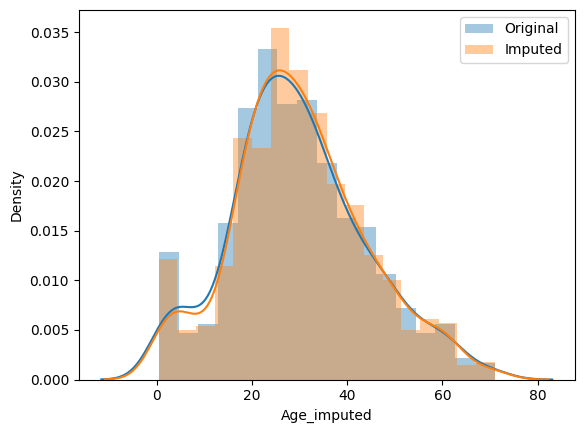

In [59]:
sns.distplot(x_train['Age'],label='Original')
sns.distplot(x_train['Age_imputed'],label='Imputed')

plt.legend()
plt.show()

In [60]:
print('Original variable variance: ',x_train['Age'].var())
print('Variance after random imputation: ',x_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  197.8442989473206


In [61]:
x_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2448.197914,70.719262,52.265743
Age,70.719262,204.349513,204.349513
Age_imputed,52.265743,204.349513,197.844299


<Axes: >

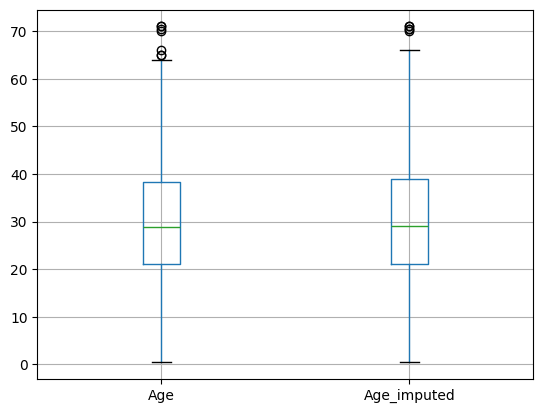

In [62]:
x_train[['Age','Age_imputed']].boxplot()

In [64]:
observation = {'Fare': 100}
sample_value = x_train['Age'].dropna().sample(1,random_state=int(observation['Fare']))

## Random Imputation in categorical data

In [65]:
data = pd.read_csv('house.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [66]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [67]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [68]:
x = data
y = data['SalePrice']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [70]:
x_train['GarageQual_imputed'] = x_train['GarageQual']
x_test['GarageQual_imputed'] = x_test['GarageQual']

x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']

In [71]:
x_train.sample()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
440,Gd,TA,555000,TA,Gd


In [72]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()] = x_test['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values

x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()] = x_test['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values

C:\Users\USER\AppData\Local\Temp\ipykernel_12536\4287893096.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual

In [73]:
x_train.isnull().sum()

FireplaceQu            557
GarageQual              65
SalePrice                0
GarageQual_imputed       0
FireplaceQu_imputed      0
dtype: int64

In [74]:
temp = pd.concat([
    x_train['GarageQual'].value_counts()/len(x_train['GarageQual'].dropna()),
    x_train['GarageQual_imputed'].value_counts()/len(x_train)
],axis=1)

temp.columns = ['original','imputed']

In [75]:
temp

,original,imputed
TA,0.951043,0.949486
Fa,0.037171,0.037671
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.001712


In [76]:
temp = pd.concat([
    x_train['FireplaceQu'].value_counts()/len(x_train['FireplaceQu'].dropna()),
    x_train['FireplaceQu_imputed'].value_counts()/len(x_train)
],axis=1)

temp.columns = ['original','imputed']

In [77]:
temp

,original,imputed
Gd,0.494272,0.488014
TA,0.412439,0.416096
Fa,0.040917,0.041952
Po,0.027823,0.028253
Ex,0.024550,0.025685


C:\Users\USER\AppData\Local\Temp\ipykernel_12536\289953143.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\USER\AppData\Local\Temp\ipykernel_12536\289953143.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

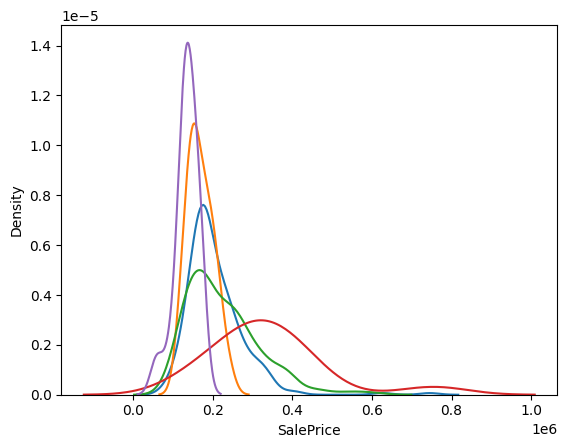

In [79]:
for category in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)

plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_12536\4020385583.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\USER\AppData\Local\Temp\ipykernel_12536\4020385583.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29

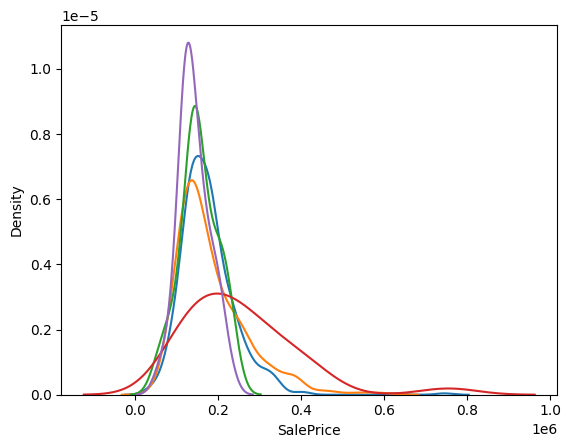

In [80]:
for category in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)

plt.show()

## Missing Indicator

Ekta column er kon kon row te value nei eta ber korar binary technique holo Missing Indicator. Missing Indicator muloto jekono column er corresponding arekta column, jekhane True/False e value rakha hoy. Corresponding column e jodi value thake tahole ei column e True otherwise False thakbe. Er karone jei model amra banabo, seta jekono ekta column e kon value False ar konta True hote pare eta alada vabe denote korte pare.

# CODE

In [81]:
from sklearn.impute import MissingIndicator, SimpleImputer

In [82]:
df = pd.read_csv('titanic_toy.csv',usecols=['Age','Fare','Survived'])

In [83]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [84]:
x = df.drop(columns='Survived')
y = df['Survived']

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [86]:
si = SimpleImputer()
x_train_trf = si.fit_transform(x_train)
x_test_trf = si.transform(x_test)

In [88]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(x_train_trf,y_train)

y_pred = clf.predict(x_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6033519553072626

In [106]:
mi = MissingIndicator()

mi.fit(x_train)

MissingIndicator()

In [107]:
mi.features_

array([0, 1], dtype=int64)

In [108]:
x_train_missing = mi.transform(x_train)

In [109]:
x_test_missing = mi.transform(x_test)

In [110]:
x_train['Age_na'] = x_train_missing[:,0]
x_test['Age_na'] = x_test_missing[:,0]
x_train['Fare_na'] = x_train_missing[:,1]
x_test['Fare_na'] = x_test_missing[:,1]
# x_train_missing[:,0]

In [111]:
x_train

,Age,Fare,Age_na,Fare_na
30,40.0,27.7208,False,False
10,4.0,16.7000,False,False
873,47.0,9.0000,False,False
182,9.0,31.3875,False,False
876,20.0,9.8458,False,False
...,...,...,...,...
534,30.0,8.6625,False,False
584,NaN,8.7125,True,False
493,71.0,49.5042,False,False
527,NaN,221.7792,True,False


In [112]:
si = SimpleImputer()

x_train_trf2 = si.fit_transform(x_train)
x_test_trf2 = si.transform(x_test)

In [113]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(x_train_trf2,y_train)

y_pred = clf.predict(x_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6089385474860335

There is a parameter in simpleImputer class named 'add_indicator'. It's False by default. If we make it True then we don't need to add indicator separately

<b>This is much cleaner than custom code</b>

In [114]:
si = SimpleImputer(add_indicator=True)

In [116]:
x_train = si.fit_transform(x_train)

In [117]:
x_test = si.transform(x_test)

In [118]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

## Autometically select value for Imputation

This works based on GridSearchCV. Scikit Learn search through all the columns and rows and finds the best result. Then use the found best result for the imputation

In [152]:
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [153]:
df = pd.read_csv('titanic.csv')

In [154]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [155]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [156]:
x = df.drop(columns='Survived')
y = df['Survived']

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [158]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
280,3,female,23.0,0,0,8.6625,S
284,3,female,2.0,1,1,20.2125,S
40,3,male,39.0,0,1,13.4167,C
17,3,male,21.0,0,0,7.2250,C
362,2,female,31.0,0,0,21.0000,S


In [159]:
numerical_features = ['Age','Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

categorical_features = ['Embarked','Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [160]:
preprocess = ColumnTransformer(
    transformers=[
        ('num',numerical_transformer,numerical_features),
        ('cat',categorical_transformer,categorical_features)
    ]
)

In [161]:
clf = Pipeline(steps=[
    ('preprocessor',preprocess),
    ('classifier',LogisticRegression())
])

In [162]:
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [166]:
param_grid = {
    'preprocessor__num__imputer__strategy':['mean','median'],
    'preprocessor__cat__imputer__strategy':['most_frequent','constant'],
    'classifier__c':[0.1,1.0,10,100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [167]:
grid_search.fit(x_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

ValueError: Invalid parameter 'c' for estimator LogisticRegression(). Valid parameters are: ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'].

In [168]:
print(f"Internal cv score: {grid_search.best_score_:.3f}")

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [169]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['param_classifier__c','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'